<a href="https://www.kaggle.com/code/luisramrez/eda-futuristic-titanic?scriptVersionId=91290132" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hello kagglers, I wanted to start this proyect to check if I can play a little bit with visualizations and visual insights. I wantted to practice a little bit of seaborn and matplotlib, maybe I'll be including some plotly.

We are dealing with Titanic (Reforged version or futuristic version).
Let's take a look at the features:
* PassengerId : includes a group or a sole person (group_number + _ + personal_id_number)
* HomePlanet : We have 3 "categories" Earth, Europe, Mars (it's gonna be interesting if at some point in time it's a planet discovered and we call it Europe)
* CryoSleep : Boolean (True or False) if the passenger was in suspended mode or not.
* Cabin : where the passanger was staying: it says that" the form deck/num/side, where side can be either P for Port or S for Starboard"
* Destination : Similar to HomePlanet, there are some categories to the "places" they were going.
* Age : self explained, Age for each passanger
* VIP : Boolean if each passanger whether or not pay for VIP
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck ---> Amenities 
* Name : Passangers name
* Transported : label or target column, whether or not the passanger was trasnported.

In [1]:
#let's import some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


Let's check how are the values 

In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
df.tail(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8673,9256_01,Earth,True,G/1494/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Darley Franton,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8676,9261_01,Earth,True,G/1504/P,PSO J318.5-22,22.0,False,0.0,0.0,0.0,0.0,0.0,Therta Casentry,False
8677,9264_01,Europa,True,E/606/S,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Giedir Sionerorly,True
8678,9267_01,Europa,True,E/607/S,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Arraid Opshaft,True
8679,9267_02,Europa,True,E/607/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Sabi Opshaft,True
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Agnesa Baldson,True
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True


there are some missing values, here and there.
let's check the DF info adn check data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are some missing values in almost all the features.
Let's visualize Missing Values %

In [5]:
(df.isnull().sum()/len(df)*100).sort_values()

PassengerId     0.000000
Transported     0.000000
Age             2.059128
RoomService     2.082135
Destination     2.093639
FoodCourt       2.105142
Spa             2.105142
VRDeck          2.162660
Cabin           2.289198
Name            2.300702
HomePlanet      2.312205
VIP             2.335212
ShoppingMall    2.392730
CryoSleep       2.496261
dtype: float64

In [6]:
values_ = (df.isnull().sum()/len(df)*100).sort_values().values
values_

array([0.        , 0.        , 2.05912803, 2.08213505, 2.09363856,
       2.10514207, 2.10514207, 2.16265961, 2.28919821, 2.30070171,
       2.31220522, 2.33521224, 2.39272978, 2.49626136])

I want to plot the % of missing value

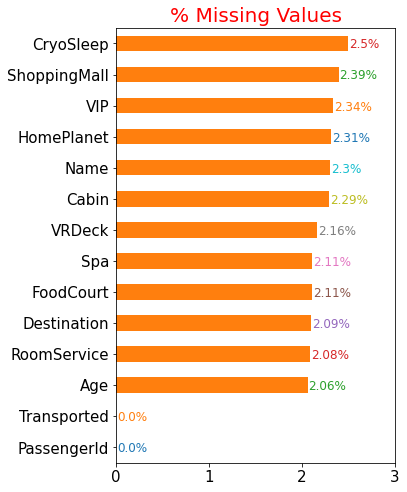

In [7]:
(df.isnull().sum()/len(df)*100).sort_values().plot(kind = 'barh', figsize = (5,8), color = 'C1', fontsize = 15, xlim =(0, 3))
plt.title('% Missing Values', fontsize = 20 , color = 'red')
plt.xticks([0,1,2,3])
for i in range(len(values_)):
    plt.text(x=values_[i]+0.01,y = i-0.15, s=f'{round(values_[i],2)}%', color = f"C{i}", fontsize = 12)

I was considering removing all the missing values since each feature only has less than 2.5% of missing values.
and why not I was wondering.
But then I realize that if that's gonna happen I'm gonna get rid of the ~25% of the data which is catasthrophic in terms of getting a robust model predictions
Let's show it:


In [8]:
total_of_removed_missing_values = 1 -  len(df.dropna(axis = 0)) / len(df)
print(f"Total percentage of missing values removed : {round(total_of_removed_missing_values *100,2)} %")

Total percentage of missing values removed : 24.01 %


Therefore, removing the missing values this way, not gonna make it work, I imagine.
So we are going to do it the "hard"way let's take a closer look at each feature

In [9]:
def mapper(df,cols, map_):
    
    for col in cols:
        df[col] = df[col].map(map_)
    return df

def fill_na_(df,cols, values):
    for col in cols:
        df[col] = df[col].fillna(values)
    return df

This mapper function will make booleans features to become numerical

In [10]:
map_ = {
    True:1,
    False:0    
}
cols = ['VIP','CryoSleep','Transported']
df = mapper(df, cols, map_)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [11]:
cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

df = fill_na_(df,cols, 0)

In amenities columns we're gonna put all of the missing values to 0. It's not ok but it's better than putting any number, or maybe, I dont' know yet, but it seems to me a good idea to fill those missing values by groups and fill it with the median of each group, but that's tryhard code.

In [12]:
cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
values = 0
for col in cols:
    values += df[col].values
df.loc[:, 'amen_total'] = values

Since we already filled all amenities MV: we gonna create a new big feature named amen_total : 
Total amenities which will be the sum of all the amenities.


Let's check out a plot of amen_total to check values

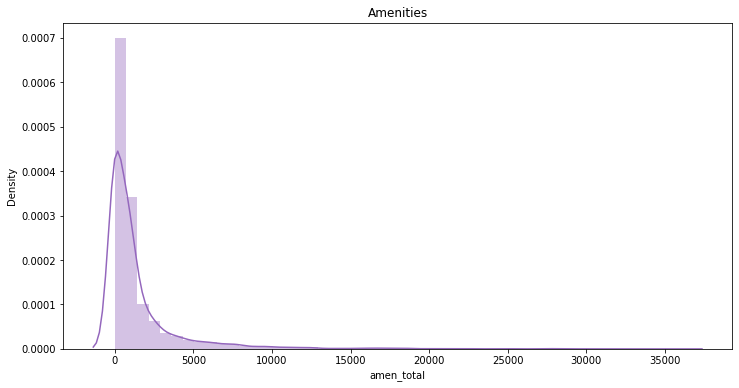

In [13]:
plt.figure(figsize = (12,6))
plt.title("Amenities")
ax = sns.distplot(df['amen_total'], kde = True, color = 'C4')


A couple of interesting things:
* a lot of people doesn't have any amenities during the voyagem either because they don't have money
* a lot of people were actually Cryosleeping. so they could not spend in amenities

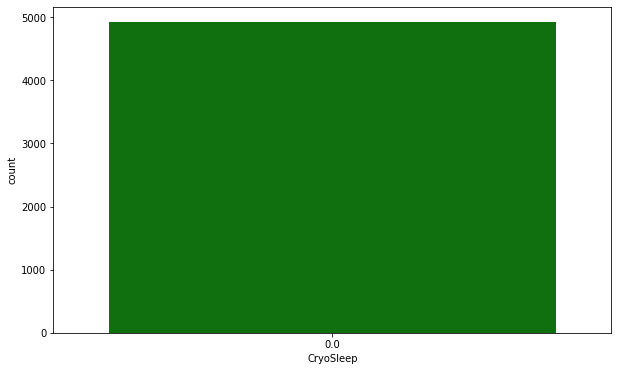

In [14]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df[(df.amen_total > 0)]['CryoSleep'], color = 'g')

This is a nice plot, While people is Cryoslepping it's not possible at all to go have amenities for any of them.

In [15]:
idxs = df.loc[~(df['CryoSleep']==1) & ~(df['CryoSleep']==0) & (df.amen_total>0)]['CryoSleep'].index

we are getting the indexes of the Cryosleep missing values and replacing all those who have amenities >0, have not been Cryoslept.

In [16]:
df.loc[idxs,'CryoSleep'] = 0

In [17]:
value_ = df.CryoSleep.value_counts()
value_

0.0    5558
1.0    3037
Name: CryoSleep, dtype: int64

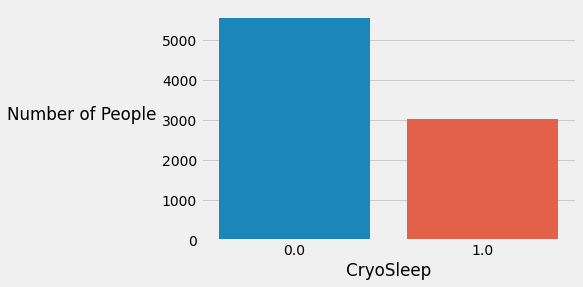

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize =(6,4))
ax = sns.countplot(df.CryoSleep, data = df);
plt.ylabel('Number of People', rotation = 0, labelpad=80)
plt.show()


* There are more people which haven't been CryoSlept.

In [19]:
idx2 = df[df['CryoSleep'].isnull()].index

In [20]:
df.loc[idx2,'CryoSleep'] = 1

I'm assuming that any other missing value here is just 1. Because they didn't have any amenities during the voyage. For instance, I can imagine they might be sleept.

In [21]:
df[df.HomePlanet.isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,amen_total
59,0064_02,NaN,1.0,E/3/S,TRAPPIST-1e,33.0,0.0,0.0,0.0,0.0,0.0,0.0,Colatz Keen,1,0.0
113,0119_01,NaN,0.0,A/0/P,TRAPPIST-1e,39.0,0.0,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,0,9307.0
186,0210_01,NaN,1.0,D/6/P,55 Cancri e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,Arraid Inicont,1,0.0
225,0242_01,NaN,0.0,F/46/S,TRAPPIST-1e,18.0,0.0,313.0,1.0,691.0,283.0,0.0,Almone Sté,0,1288.0
234,0251_01,NaN,1.0,C/11/S,55 Cancri e,54.0,0.0,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,1,0.0


In [22]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [23]:
df.Transported.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [24]:
df.groupby('HomePlanet')['Transported'].count()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: Transported, dtype: int64

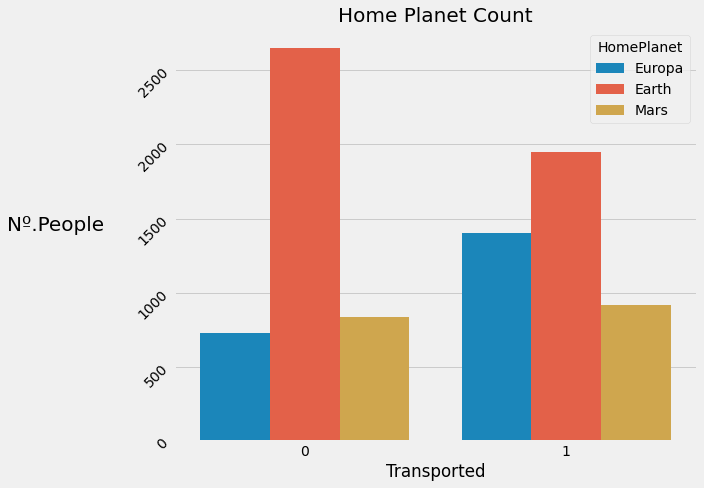

In [25]:
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')


plt.figure(figsize = (10,7))
ax = sns.countplot(x = 'Transported', hue = 'HomePlanet', data = df);
ax.set_title('Home Planet Count',fontsize=20);
ax.set_ylabel('Nº.People', rotation=0, fontsize=20, labelpad=80)

labels = ax.get_yticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

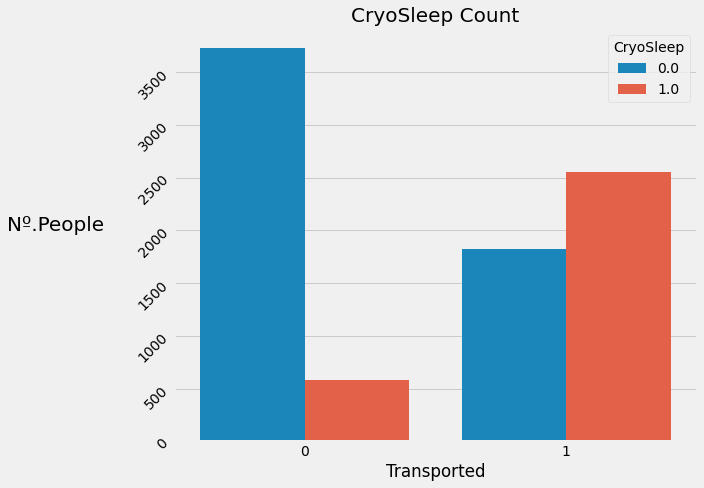

In [26]:
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')


plt.figure(figsize = (10,7))
ax = sns.countplot(x = 'Transported', hue = 'CryoSleep', data = df);
ax.set_title('CryoSleep Count',fontsize=20);
ax.set_ylabel('Nº.People', rotation=0, fontsize=20, labelpad=80)

labels = ax.get_yticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

In [27]:
df.groupby(['Transported','VIP'])['VIP'].count()

Transported  VIP
0            0.0    4093
             1.0     123
1            0.0    4198
             1.0      76
Name: VIP, dtype: int64

In [28]:
def give_me_quartiles(df,x,y):
    grouper = df.groupby(x)[y]
    min_,q_1,q_2,q_3,max_ = [grouper.quantile(number/4) for number in range(0,5)]
    return q_1,q_2,q_3,max_, min_, q_3 + (q_3-q_1)*1.5 


In [29]:
df.loc[:,'amenities_bool'] =np.where(values> 0, 1,0)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,amen_total,amenities_bool
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,1
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,1
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,1
8689,9278_01,Earth,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,0
8690,9279_01,Earth,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,1
8691,9280_01,Europa,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,1


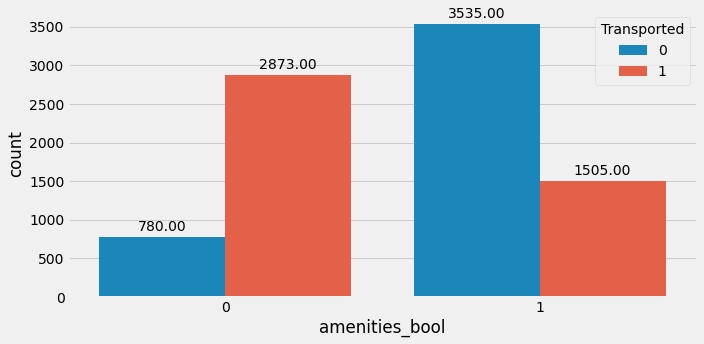

In [30]:

plt.figure(figsize = (10,5))
ax = sns.countplot(x='amenities_bool', hue ='Transported', data = df)
for _,p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center', xytext = (0, 10),
                textcoords = 'offset points')
                
#     ax.text(x = p.get_x()+0.42, 
#             y = (p.get_height()/2)+1,
#             s = f'{list_[_]}%',
#             color =f'C{7-_}'
#            )


In [31]:
df['PassengerId'].apply(lambda x : int(str(x).split('_')[0])).nunique()

6217

In [32]:
l_ = df['PassengerId'].apply(lambda x : int(str(x).split('_')[0])).values
l2 = [1 if list(l_).count(valor)>=2 else 0 for valor in l_]

df.loc[:,'with_sg']= np.array(l2)

<AxesSubplot:xlabel='with_sg', ylabel='count'>

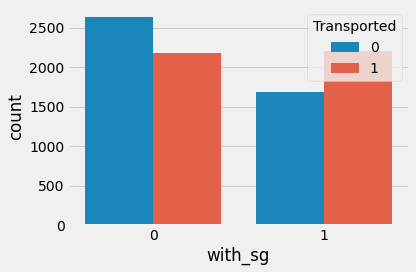

In [33]:
sns.countplot(x = 'with_sg', hue = 'Transported', data = df)

<AxesSubplot:xlabel='amenities_bool', ylabel='count'>

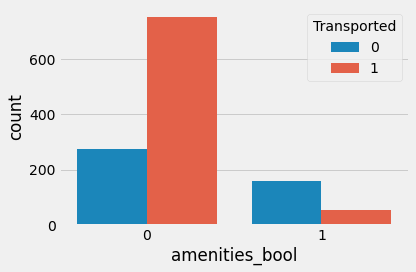

In [34]:
x = df.loc[df['Age']<=15]['amenities_bool']
sns.countplot(x, hue ='Transported', data = df)

<AxesSubplot:xlabel='with_sg', ylabel='count'>

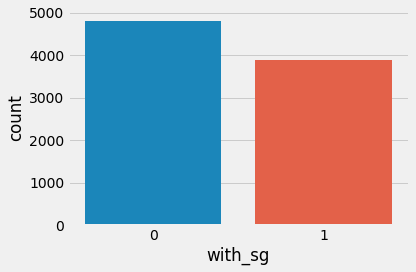

In [35]:
sns.countplot(x = 'with_sg', data = df)

In [36]:
df['groups'] = df['PassengerId'].apply(lambda x: int(str(x).split('_')[0]))

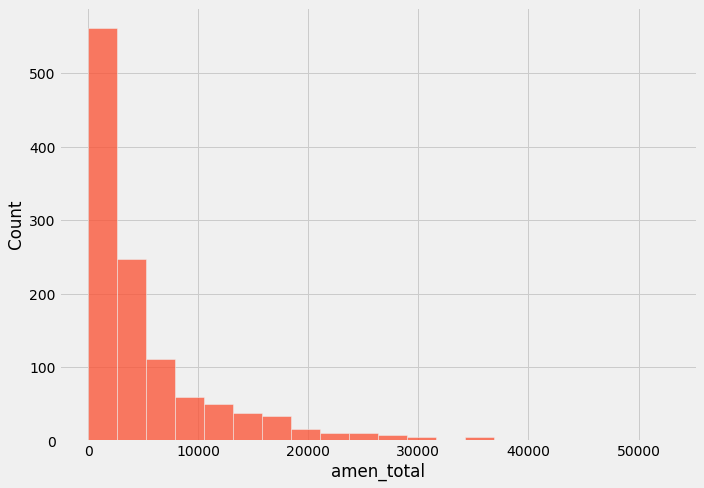

In [37]:
plt.figure(figsize = (10,7))
ax = sns.histplot(df[(df['amen_total']> 0) & (df['with_sg']==1)].groupby('groups')['amen_total'].sum(), bins=20, color ='C1')

In [38]:
x = df[(df['amen_total']> 0) & (df['with_sg']==1)].groupby('groups')['amen_total'].sum()
x.sort_values(ascending = False)

groups
4594    52668.0
6866    45970.0
4181    40121.0
5466    39228.0
2215    37520.0
         ...   
5938       52.0
103        17.0
320        10.0
982         4.0
3641        1.0
Name: amen_total, Length: 1167, dtype: float64

In [39]:
df.loc[df['groups']==4594]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,amen_total,amenities_bool,with_sg,groups
4310,4594_01,Europa,0.0,C/144/P,TRAPPIST-1e,64.0,0.0,77.0,2424.0,0.0,3001.0,127.0,Tabius Folhal,0,5629.0,1,1,4594
4311,4594_02,Europa,0.0,C/144/P,TRAPPIST-1e,31.0,0.0,0.0,6670.0,217.0,625.0,20336.0,Tabiton Folhal,0,27848.0,1,1,4594
4312,4594_03,Europa,0.0,C/144/P,TRAPPIST-1e,27.0,0.0,267.0,2802.0,0.0,54.0,77.0,Minoton Folhal,1,3200.0,1,1,4594
4313,4594_04,Europa,0.0,C/144/P,TRAPPIST-1e,NaN,0.0,0.0,4516.0,0.0,6167.0,5308.0,Furus Coudered,0,15991.0,1,1,4594


In [40]:
df[df['with_sg']==1].groupby('groups')['Transported'].count().sort_values()

groups
3       2
5344    2
5345    2
5353    2
5354    2
       ..
5885    8
9081    8
4256    8
8728    8
8988    8
Name: Transported, Length: 1412, dtype: int64

In [41]:
df[df['with_sg']==0].groupby('groups')['Transported'].count().sort_values()

groups
1       1
6127    1
6126    1
6124    1
6123    1
       ..
3067    1
3066    1
3065    1
3062    1
9279    1
Name: Transported, Length: 4805, dtype: int64

In [42]:
df.loc[df['groups']==8988]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,amen_total,amenities_bool,with_sg,groups
8407,8988_01,Earth,1.0,G/1448/S,TRAPPIST-1e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Maen Fowlesterez,1,0.0,0,1,8988
8408,8988_02,Earth,1.0,G/1448/S,55 Cancri e,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Idacey Fowlesterez,1,0.0,0,1,8988
8409,8988_03,Earth,1.0,G/1448/S,55 Cancri e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Catha Fowlesterez,1,0.0,0,1,8988
8410,8988_04,Earth,1.0,G/1448/S,TRAPPIST-1e,5.0,0.0,0.0,0.0,0.0,0.0,0.0,Joanry Malliamsey,0,0.0,0,1,8988
8411,8988_05,Earth,0.0,F/1741/S,TRAPPIST-1e,30.0,0.0,0.0,1028.0,0.0,80.0,0.0,Melara Fowlesterez,0,1108.0,1,1,8988
8412,8988_06,Earth,1.0,G/1448/S,TRAPPIST-1e,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Caseye Fowlesterez,1,0.0,0,1,8988
8413,8988_07,Earth,0.0,F/1741/S,TRAPPIST-1e,53.0,0.0,0.0,1487.0,0.0,67.0,0.0,Heila Malliamsey,0,1554.0,1,1,8988
8414,8988_08,Earth,1.0,G/1448/S,TRAPPIST-1e,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Neila Fowlesterez,0,0.0,0,1,8988


<AxesSubplot:xlabel='with_sg', ylabel='amen_total'>

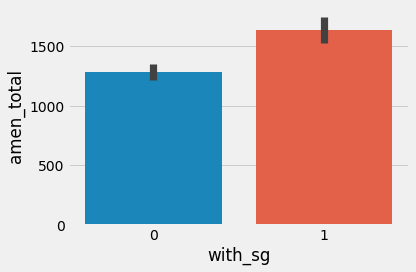

In [43]:
sns.barplot(x ='with_sg', y='amen_total', data = df)

In [44]:
A = df.loc[df.with_sg == 1]['Cabin'].isnull()
# l_ = [index for (index,element) in enumerate(A.isnull()) if element]
# df.iloc[l_]    
df.iloc[A[A==True].index]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,amen_total,amenities_bool,with_sg,groups
103,0110_01,Europa,0.0,NaN,TRAPPIST-1e,32.0,0.0,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,0,5109.0,1,1,110
227,0244_01,Mars,1.0,NaN,TRAPPIST-1e,43.0,0.0,0.0,0.0,0.0,0.0,0.0,Froos Sad,1,0.0,0,1,244
251,0278_01,Earth,0.0,NaN,TRAPPIST-1e,35.0,0.0,0.0,0.0,0.0,888.0,0.0,Judya Beachez,0,888.0,1,1,278
260,0287_01,Europa,1.0,NaN,55 Cancri e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Tetra Bootty,1,0.0,0,1,287
314,0348_02,Mars,0.0,NaN,TRAPPIST-1e,36.0,0.0,520.0,0.0,1865.0,0.0,0.0,Weet Mane,1,2385.0,1,1,348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,8770_03,Earth,0.0,NaN,PSO J318.5-22,14.0,0.0,476.0,14.0,0.0,328.0,8.0,Sony Morgerson,0,826.0,1,1,8770
8209,8772_02,Europa,0.0,NaN,55 Cancri e,53.0,0.0,0.0,1127.0,0.0,3939.0,0.0,Naosura Motled,0,5066.0,1,1,8772
8475,9057_01,Europa,0.0,NaN,55 Cancri e,36.0,1.0,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,0,7397.0,1,1,9057
8485,9069_03,Europa,1.0,NaN,55 Cancri e,25.0,0.0,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,1,0.0,0,1,9069


In [45]:
list_ = df.groupby(['Transported', 'VIP'])['VIP'].count()
list_.loc[0,:] = round(list_.loc[0,:] / sum(list_.loc[0,:]) *100,2)
list_.loc[1,:] = round(list_.loc[1,:] / sum(list_.loc[1,:]) *100,2)
list_ = sorted(list_.values,reverse =True)

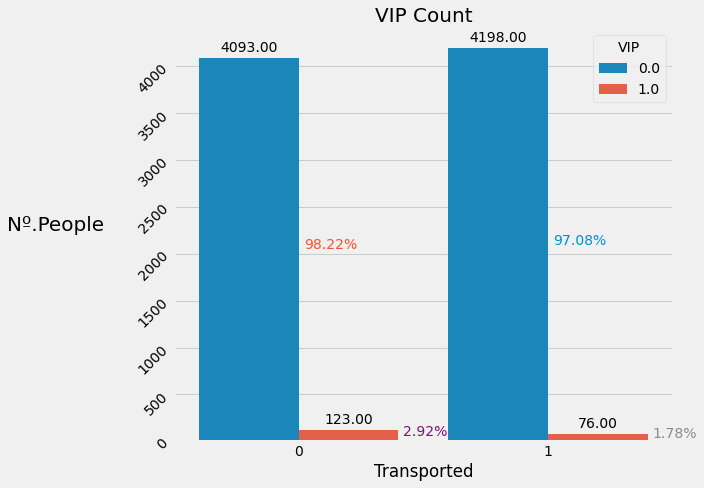

In [46]:
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')


plt.figure(figsize = (10,7))
ax = sns.countplot(x = 'Transported',
                   hue = 'VIP',
                   data = df);
ax.set_title('VIP Count',
             fontsize=20);

ax.set_ylabel('Nº.People',
              rotation=0,
              fontsize=20,
              labelpad=80)
labels = ax.get_yticklabels()
plt.setp(
    labels,
    rotation=45,
    horizontalalignment='right'
);

for _,p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center', xytext = (0, 10),
                textcoords = 'offset points')
                
    ax.text(x = p.get_x()+0.42, 
            y = (p.get_height()/2)+1,
            s = f'{list_[_]}%',
            color =f'C{7-_}'
           )

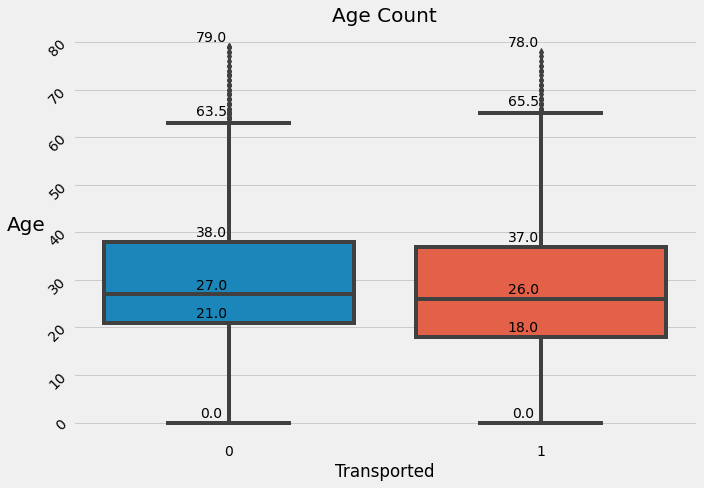

In [47]:
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,7))
ax = sns.boxplot(x = df['Transported'],y = df['Age'] );
ax.set_title('Age Count',fontsize=20);
ax.set_ylabel('Age', rotation=0, fontsize=20, labelpad=20)
labels = ax.get_yticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');
Q_l = give_me_quartiles(df, 'Transported', 'Age')
for Q in Q_l:
    for i in range(len(Q)):
        ax.annotate(str(Q[i]), xy =(i-0.056, Q[i]+1), horizontalalignment='center')